In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 10.4 

In [2]:
from google.colab import drive
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet152
from keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,GlobalAveragePooling2D,Concatenate,BatchNormalization
from keras.models import Model
from keras.utils import plot_model
import random as rn
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout, Conv2D, MaxPooling2D #keras.applications
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from prettytable import PrettyTable
import pickle
import gradio as gr


In [3]:
import requests
import urllib

In [ ]:
!pip freeze > requirements.txt

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
extract = zipfile.ZipFile('/content/drive/MyDrive/Capstone_1/Project_1.zip')
extract.extractall()

In [ ]:
def extract_paths_and_labels_from_zip(zip_path, valid_categories, valid_subcategories):

    if not os.path.exists(zip_path):
        raise ValueError(f"File {zip_path} does not exist.")

    data = []


    with zipfile.ZipFile(zip_path, 'r') as z:

        file_names = z.namelist()


        for file_name in file_names:

            parts = file_name.split('/')


            if len(parts) > 2 and parts[1] in valid_categories and parts[2] in valid_subcategories:

                label = parts[2]


                data.append({'image_path': file_name, 'label': label})

    return data


In [ ]:
valid_categories = ['train', 'test']
valid_subcategories = ['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', '___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Black_rot', 'Apple___healthy', 'Strawberry___Leaf_scorch', 'Potato___healthy', 'Soybean___healthy']


In [ ]:
data = extract_paths_and_labels_from_zip('/content/drive/MyDrive/Capstone_1/Project_1.zip', valid_categories, valid_subcategories)

In [ ]:
df = pd.DataFrame(data)
df.head(10)

image_path                         label
0          Project_1/train/Strawberry___healthy/          Strawberry___healthy
1             Project_1/train/Grape___Black_rot/             Grape___Black_rot
2         Project_1/train/Potato___Early_blight/         Potato___Early_blight
3           Project_1/train/Blueberry___healthy/           Blueberry___healthy
4        Project_1/train/Corn_(maize)___healthy/        Corn_(maize)___healthy
5          Project_1/train/Tomato___Target_Spot/          Tomato___Target_Spot
6               Project_1/train/Peach___healthy/               Peach___healthy
7          Project_1/train/Potato___Late_blight/          Potato___Late_blight
8          Project_1/train/Tomato___Late_blight/          Tomato___Late_blight
9  Project_1/train/Tomato___Tomato_mosaic_virus/  Tomato___Tomato_mosaic_virus

In [ ]:
updated_df = df.iloc[37:].reset_index(drop=True)
updated_df.sample(10)

image_path  \
52004  Project_1/train/Peach___Bacterial_spot/16dafd5...   
30046  Project_1/train/Tomato___Bacterial_spot/e39108...   
38598  Project_1/train/Grape___Esca_(Black_Measles)/8...   
20852  Project_1/train/Orange___Haunglongbing_(Citrus...   
33843  Project_1/train/Tomato___Early_blight/647ccba0...   
56634  Project_1/train/Tomato___Septoria_leaf_spot/ee...   
19449  Project_1/train/Pepper,_bell___healthy/8d95c59...   
35249  Project_1/train/Corn_(maize)___Common_rust_/RS...   
25148  Project_1/train/Grape___Leaf_blight_(Isariopsi...   
60666  Project_1/train/Apple___Black_rot/a59e57c9-a91...   

                                            label  
52004                      Peach___Bacterial_spot  
30046                     Tomato___Bacterial_spot  
38598                Grape___Esca_(Black_Measles)  
20852    Orange___Haunglongbing_(Citrus_greening)  
33843                       Tomato___Early_blight  
56634                 Tomato___Septoria_leaf_spot  
19449                      Pepper,_bell___healthy  
35249                 Corn_(maize)___Common_rust_  
25148  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)  
60666                           Apple___Black_rot

In [ ]:
updated_df['plant Type'] = updated_df['label'].apply(lambda x: x.split('___')[0])

In [ ]:
updated_df['plant Type'] = updated_df['label'].apply(lambda x: x.split('_')[0])

In [ ]:
updated_df.sample(50)

image_path  \
62440  Project_1/train/Apple___healthy/fdbfa6f7-f887-...   
47285  Project_1/train/Apple___Apple_scab/b963d384-12...   
6284   Project_1/train/Blueberry___healthy/cff19a03-e...   
60024  Project_1/train/Apple___Black_rot/aaac9e5e-60d...   
32471  Project_1/train/Grape___healthy/9502b5fa-3a8e-...   
55589  Project_1/train/Tomato___Septoria_leaf_spot/25...   
55321  Project_1/train/Pepper,_bell___Bacterial_spot/...   
43088  Project_1/train/Cherry_(including_sour)___heal...   
64960  Project_1/train/Potato___healthy/71c06efe-089f...   
35088  Project_1/train/Corn_(maize)___Common_rust_/RS...   
46358  Project_1/train/Apple___Apple_scab/680c56ea-dc...   
51302  Project_1/train/Tomato___Spider_mites Two-spot...   
5989   Project_1/train/Blueberry___healthy/2d8540de-c...   
37018  Project_1/train/Grape___Esca_(Black_Measles)/2...   
36886  Project_1/train/Grape___Esca_(Black_Measles)/f...   
16534  Project_1/train/Tomato___Late_blight/f8e2f06c-...   
67614  Project_1/train/Soybean___healthy/eb312576-bdd...   
34917  Project_1/train/Corn_(maize)___Common_rust_/RS...   
66903  Project_1/train/Soybean___healthy/a18b0cd5-937...   
18226  Project_1/train/Tomato___Tomato_mosaic_virus/0...   
12548  Project_1/train/Peach___healthy/5abd9d91-43c1-...   
22752  Project_1/train/Tomato___Leaf_Mold/097b050a-ea...   
53183  Project_1/train/Peach___Bacterial_spot/71aec5d...   
41748  Project_1/train/Tomato___healthy/bd7ec723-4020...   
22858  Project_1/train/Tomato___Leaf_Mold/0c0debed-e8...   
42583  Project_1/train/Cherry_(including_sour)___heal...   
14963  Project_1/train/Tomato___Late_blight/4710d5cd-...   
61924  Project_1/train/Apple___healthy/b228e0e9-6082-...   
45227  Project_1/train/Tomato___Tomato_Yellow_Leaf_Cu...   
14405  Project_1/train/Potato___Late_blight/c58de13c-...   
11049  Project_1/train/Tomato___Target_Spot/0fe6221c-...   
56403  Project_1/train/Tomato___Septoria_leaf_spot/3d...   
62558  Project_1/train/Apple___healthy/f7b08c73-ec97-...   
55778  Project_1/train/Tomato___Septoria_leaf_spot/d1...   
20587  Project_1/train/Orange___Haunglongbing_(Citrus...   
44904  Project_1/train/Tomato___Tomato_Yellow_Leaf_Cu...   
41298  Project_1/train/Tomato___healthy/1a393116-cbd1...   
10638  Project_1/train/Tomato___Target_Spot/6db16a45-...   
37688  Project_1/train/Grape___Esca_(Black_Measles)/5...   
10243  Project_1/train/Tomato___Target_Spot/54027b17-...   
50631  Project_1/train/Tomato___Spider_mites Two-spot...   
7090   Project_1/train/Blueberry___healthy/1ed0011f-1...   
43918  Project_1/train/Cherry_(including_sour)___heal...   
32798  Project_1/train/Grape___healthy/0294ca65-4c29-...   
5553   Project_1/train/Potato___Early_blight/d1625c19...   
40735  Project_1/train/Tomato___healthy/1f763a4e-3f17...   
65928  Project_1/train/Potato___healthy/d340704d-cc00...   
1900   Project_1/train/Grape___Black_rot/29603fff-11e...   
36473  Project_1/train/Corn_(maize)___Common_rust_/RS...   
61757  Project_1/train/Apple___healthy/925d0f0f-08ae-...   

                                               label plant Type  
62440                                Apple___healthy      Apple  
47285                             Apple___Apple_scab      Apple  
6284                             Blueberry___healthy  Blueberry  
60024                              Apple___Black_rot      Apple  
32471                                Grape___healthy      Grape  
55589                    Tomato___Septoria_leaf_spot     Tomato  
55321                  Pepper,_bell___Bacterial_spot    Pepper,  
43088              Cherry_(including_sour)___healthy     Cherry  
64960                               Potato___healthy     Potato  
35088                    Corn_(maize)___Common_rust_       Corn  
46358                             Apple___Apple_scab      Apple  
51302  Tomato___Spider_mites Two-spotted_spider_mite     Tomato  
5989                             Blueberry___healthy  Blueberry  
37018                   Grape___Esca_(Black_Measles)      Gra

In [ ]:
updated_df['disease Type'] = updated_df['label'].apply(lambda x: x.split('_')[-1])

In [ ]:
updated_df['combined'] = updated_df['plant Type'] + "_" + updated_df['disease Type']


In [ ]:
def clean_label(label):
    words = label.split()
    cleaned_words = [words[i] for i in range(len(words)) if i == 0 or words[i] != words[i-1]]
    cleaned_label = ' '.join(cleaned_words)
    return cleaned_label.replace('(', '').replace(')', '').replace('.', '').replace(',', '').replace('_', ' ').replace('  ', ' ').lower()

# Apply the function to clean the labels
updated_df['label'] = updated_df['label'].apply(clean_label)
updated_df

image_path                label  \
0      Project_1/train/Strawberry___healthy/0370bc9b-...  strawberry  healthy   
1      Project_1/train/Strawberry___healthy/741e834f-...  strawberry  healthy   
2      Project_1/train/Strawberry___healthy/b8e9ed27-...  strawberry  healthy   
3      Project_1/train/Strawberry___healthy/ac5bf646-...  strawberry  healthy   
4      Project_1/train/Strawberry___healthy/d07e9834-...  strawberry  healthy   
...                                                  ...                  ...   
68648  Project_1/train/Soybean___healthy/c127579f-980...     soybean  healthy   
68649  Project_1/train/Soybean___healthy/31800ff8-157...     soybean  healthy   
68650  Project_1/train/Soybean___healthy/9898aa61-280...     soybean  healthy   
68651  Project_1/train/Soybean___healthy/df807f13-078...     soybean  healthy   
68652  Project_1/train/Soybean___healthy/c7f4b7b2-b13...     soybean  healthy   

       plant Type disease Type            combined  
0      Strawberry      healthy  Strawberry_healthy  
1      Strawberry      healthy  Strawberry_healthy  
2      Strawberry      healthy  Strawberry_healthy  
3      Strawberry      healthy  Strawberry_healthy  
4      Strawberry      healthy  Strawberry_healthy  
...           ...          ...                 ...  
68648     Soybean      healthy     Soybean_healthy  
68649     Soybean      healthy     Soybean_healthy  
68650     Soybean      healthy     Soybean_healthy  
68651     Soybean      healthy     Soybean_healthy  
68652     Soybean      healthy     Soybean_healthy  

[68653 rows x 5 columns]

In [ ]:
unique_values = updated_df['label'].unique()

# Convert to list (optional)
unique_values_list = unique_values.tolist()

# Print the list
print(unique_values_list)

['strawberry  healthy', 'grape  black rot', 'potato  early blight', 'blueberry  healthy', 'corn maize  healthy', 'tomato  target spot', 'peach  healthy', 'potato  late blight', 'tomato  late blight', 'tomato  tomato mosaic virus', 'pepper bell  healthy', 'orange  haunglongbing citrus greening', 'tomato  leaf mold', 'grape  leaf blight isariopsis leaf spot', 'cherry including sour  powdery mildew', 'apple  cedar apple rust', 'tomato  bacterial spot', 'grape  healthy', 'tomato  early blight', 'corn maize  common rust ', 'grape  esca black measles', 'raspberry  healthy', 'tomato  healthy', 'cherry including sour  healthy', 'tomato  tomato yellow leaf curl virus', 'apple  apple scab', 'corn maize  northern leaf blight', 'tomato  spider mites two-spotted spider mite', 'peach  bacterial spot', 'pepper bell  bacterial spot', 'tomato  septoria leaf spot', 'squash  powdery mildew', 'apple  black rot', 'apple  healthy', 'strawberry  leaf scorch', 'potato  healthy', 'soybean  healthy']


In [ ]:
labels = unique_values_list

In [ ]:
labels

['strawberry  healthy',
 'grape  black rot',
 'potato  early blight',
 'blueberry  healthy',
 'corn maize  healthy',
 'tomato  target spot',
 'peach  healthy',
 'potato  late blight',
 'tomato  late blight',
 'tomato  tomato mosaic virus',
 'pepper bell  healthy',
 'orange  haunglongbing citrus greening',
 'tomato  leaf mold',
 'grape  leaf blight isariopsis leaf spot',
 'cherry including sour  powdery mildew',
 'apple  cedar apple rust',
 'tomato  bacterial spot',
 'grape  healthy',
 'tomato  early blight',
 'corn maize  common rust ',
 'grape  esca black measles',
 'raspberry  healthy',
 'tomato  healthy',
 'cherry including sour  healthy',
 'tomato  tomato yellow leaf curl virus',
 'apple  apple scab',
 'corn maize  northern leaf blight',
 'tomato  spider mites two-spotted spider mite',
 'peach  bacterial spot',
 'pepper bell  bacterial spot',
 'tomato  septoria leaf spot',
 'squash  powdery mildew',
 'apple  black rot',
 'apple  healthy',
 'strawberry  leaf scorch',
 'potato  healt

In [ ]:
disease_counts = updated_df.groupby(['plant Type', 'label']).size().reset_index(name='counts')

# Sorting by plant Type and then by counts
sorted_disease_counts = disease_counts.sort_values(by=['plant Type', 'counts'], ascending=[True, False])

sorted_disease_counts

plant Type                                         label  counts
0        Apple                             apple  apple scab    2016
3        Apple                                apple  healthy    2008
1        Apple                              apple  black rot    1987
2        Apple                       apple  cedar apple rust    1760
4    Blueberry                            blueberry  healthy    1816
5       Cherry                cherry including sour  healthy    1826
6       Cherry         cherry including sour  powdery mildew    1683
9         Corn              corn maize  northern leaf blight    1908
7         Corn                      corn maize  common rust     1907
8         Corn                           corn maize  healthy    1859
11       Grape                     grape  esca black measles    1920
10       Grape                              grape  black rot    1888
13       Grape       grape  leaf blight isariopsis leaf spot    1722
12       Grape                                grape  healthy    1692
14      Orange         orange  haunglongbing citrus greening    2010
15       Peach                         peach  bacterial spot    1838
16       Peach                                peach  healthy    1728
18     Pepper,                          pepper bell  healthy    1988
17     Pepper,                   pepper bell  bacterial spot    1913
19      Potato                          potato  early blight    1939
21      Potato                           potato  late blight    1939
20      Potato                               potato  healthy    1824
22   Raspberry                            raspberry  healthy    1781
23     Soybean                              soybean  healthy    2022
24      Squash                        squash  powdery mildew    1736
25  Strawberry                           strawberry  healthy    1824
26  Strawberry                       strawberry  leaf scorch    1774
36      Tomato         tomato  tomato yellow leaf curl virus    1961
29      Tomato                               tomato  healthy    1926
28      Tomato                          tomato  early blight    1920
31      Tomato                             tomato  leaf mold    1882
30      Tomato                           tomato  late blight    1851
34      Tomato                           tomato  target spot    1827
35      Tomato                   tomato  tomato mosaic virus    1790
32      Tomato                    tomato  septoria leaf spot    1745
33      Tomato  tomato  spider mites two-spotted spider mite    1741
27      Tomato                        tomato  bacterial spot    1702

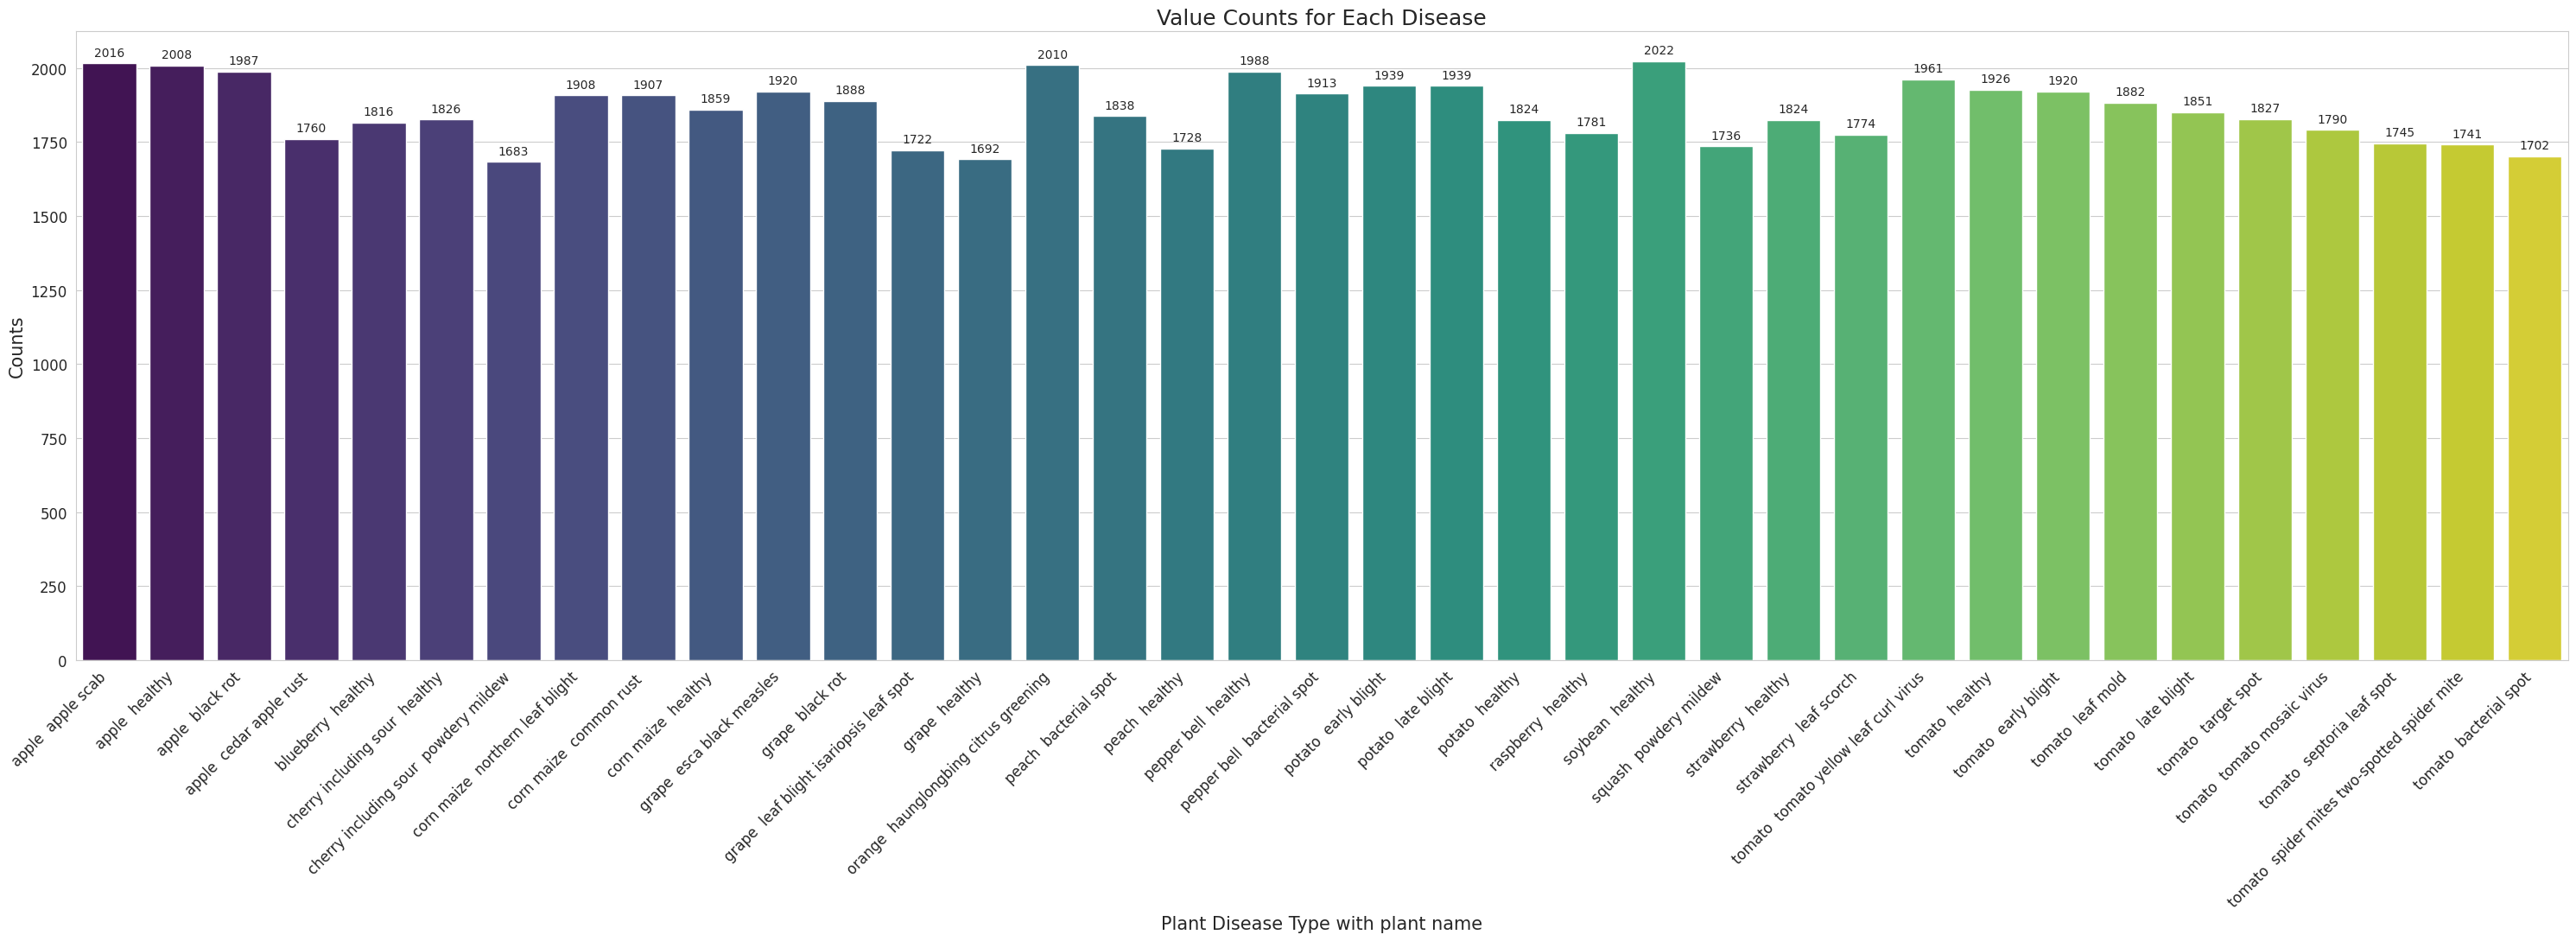

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(30,11))
colors = sns.color_palette("viridis", len(sorted_disease_counts['label'].unique()))
s = sns.barplot(x=sorted_disease_counts['label'], y=sorted_disease_counts['counts'], palette=colors)

for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.xlabel('Plant Disease Type with plant name', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Value Counts for Each Disease', fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

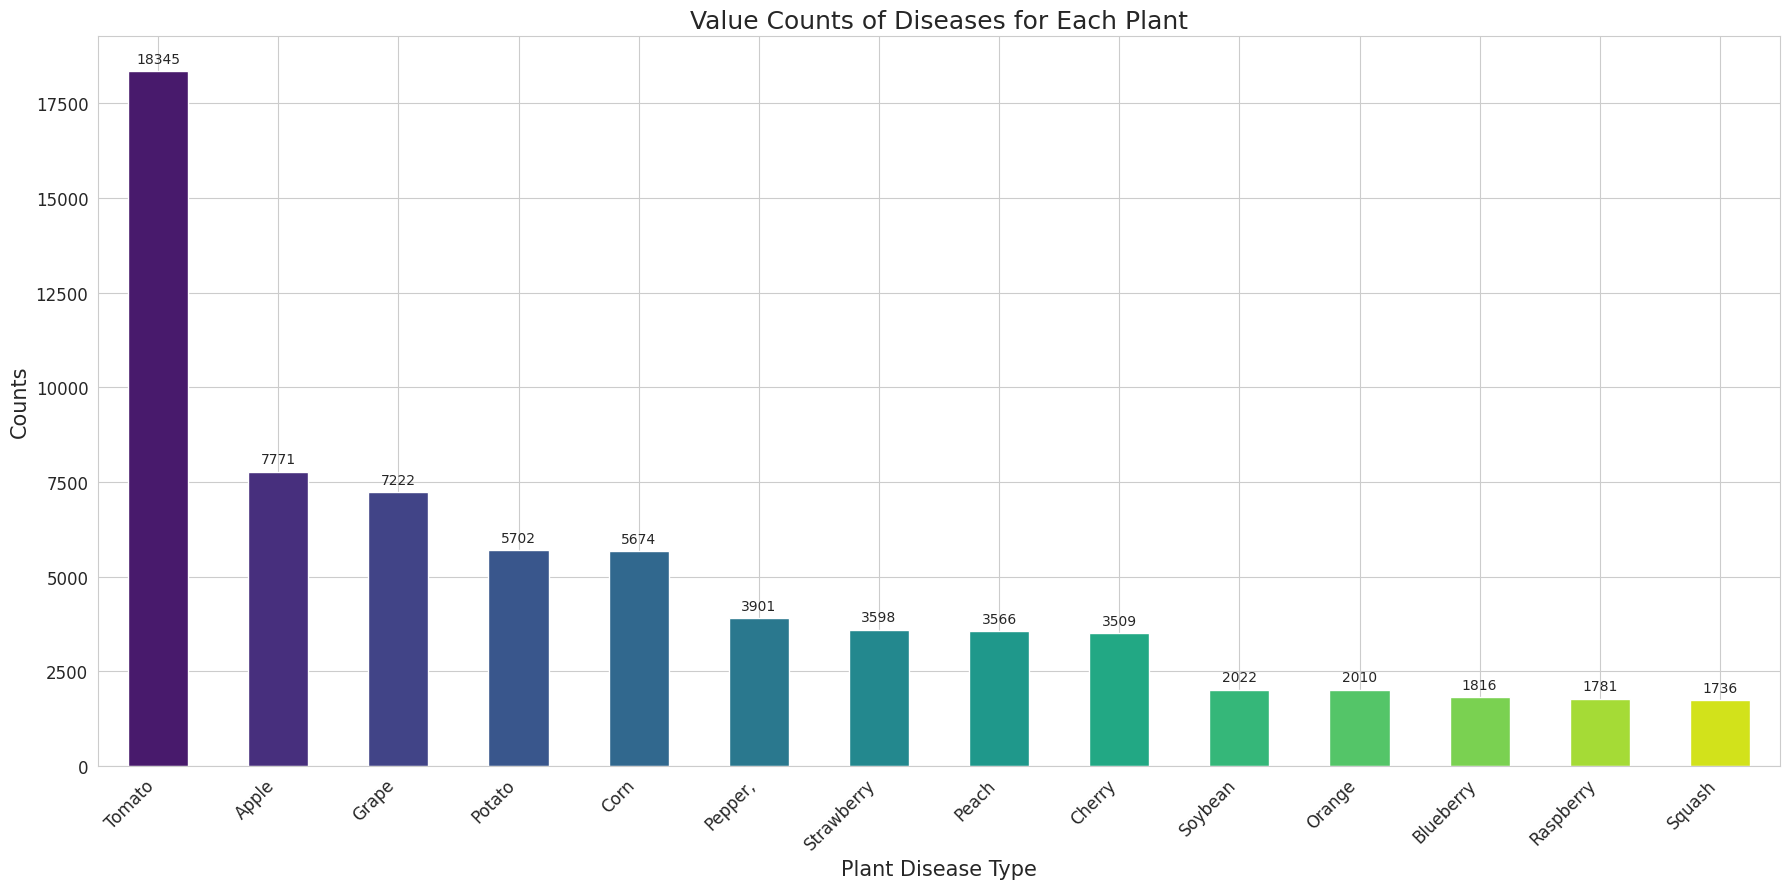

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(18, 9))
colors = sns.color_palette("viridis", len(updated_df['plant Type'].unique()))
s = updated_df['plant Type'].value_counts().plot(kind='bar', color=colors)

for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.xlabel('Plant Disease Type', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Value Counts of Diseases for Each Plant', fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
def plot_disease_counts_for_plants(dataframe):
    # Get unique plant types
    plant_types = dataframe['plant Type'].unique()

    # Determine the layout for subplots (based on the number of plants)
    n = len(plant_types)
    ncols = 3  # for a 3-column layout
    nrows = n // ncols + (n % ncols > 0)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))

    # If there's only one row, axes is a 1D array
    if nrows == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, plant in enumerate(plant_types):
        ax = axes[i // ncols, i % ncols]

        # Filter data for the current plant and get disease counts
        filtered_df = dataframe[dataframe['plant Type'] == plant]
        disease_counts = filtered_df['disease Type'].value_counts()

        # Plot the bar chart on the current subplot
        disease_counts.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(plant)
        ax.set_ylabel('Count')
        ax.set_xlabel('Disease Type')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticklabels(disease_counts.index, rotation=45)

    # Remove any unused subplots
    for j in range(i+1, nrows*ncols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

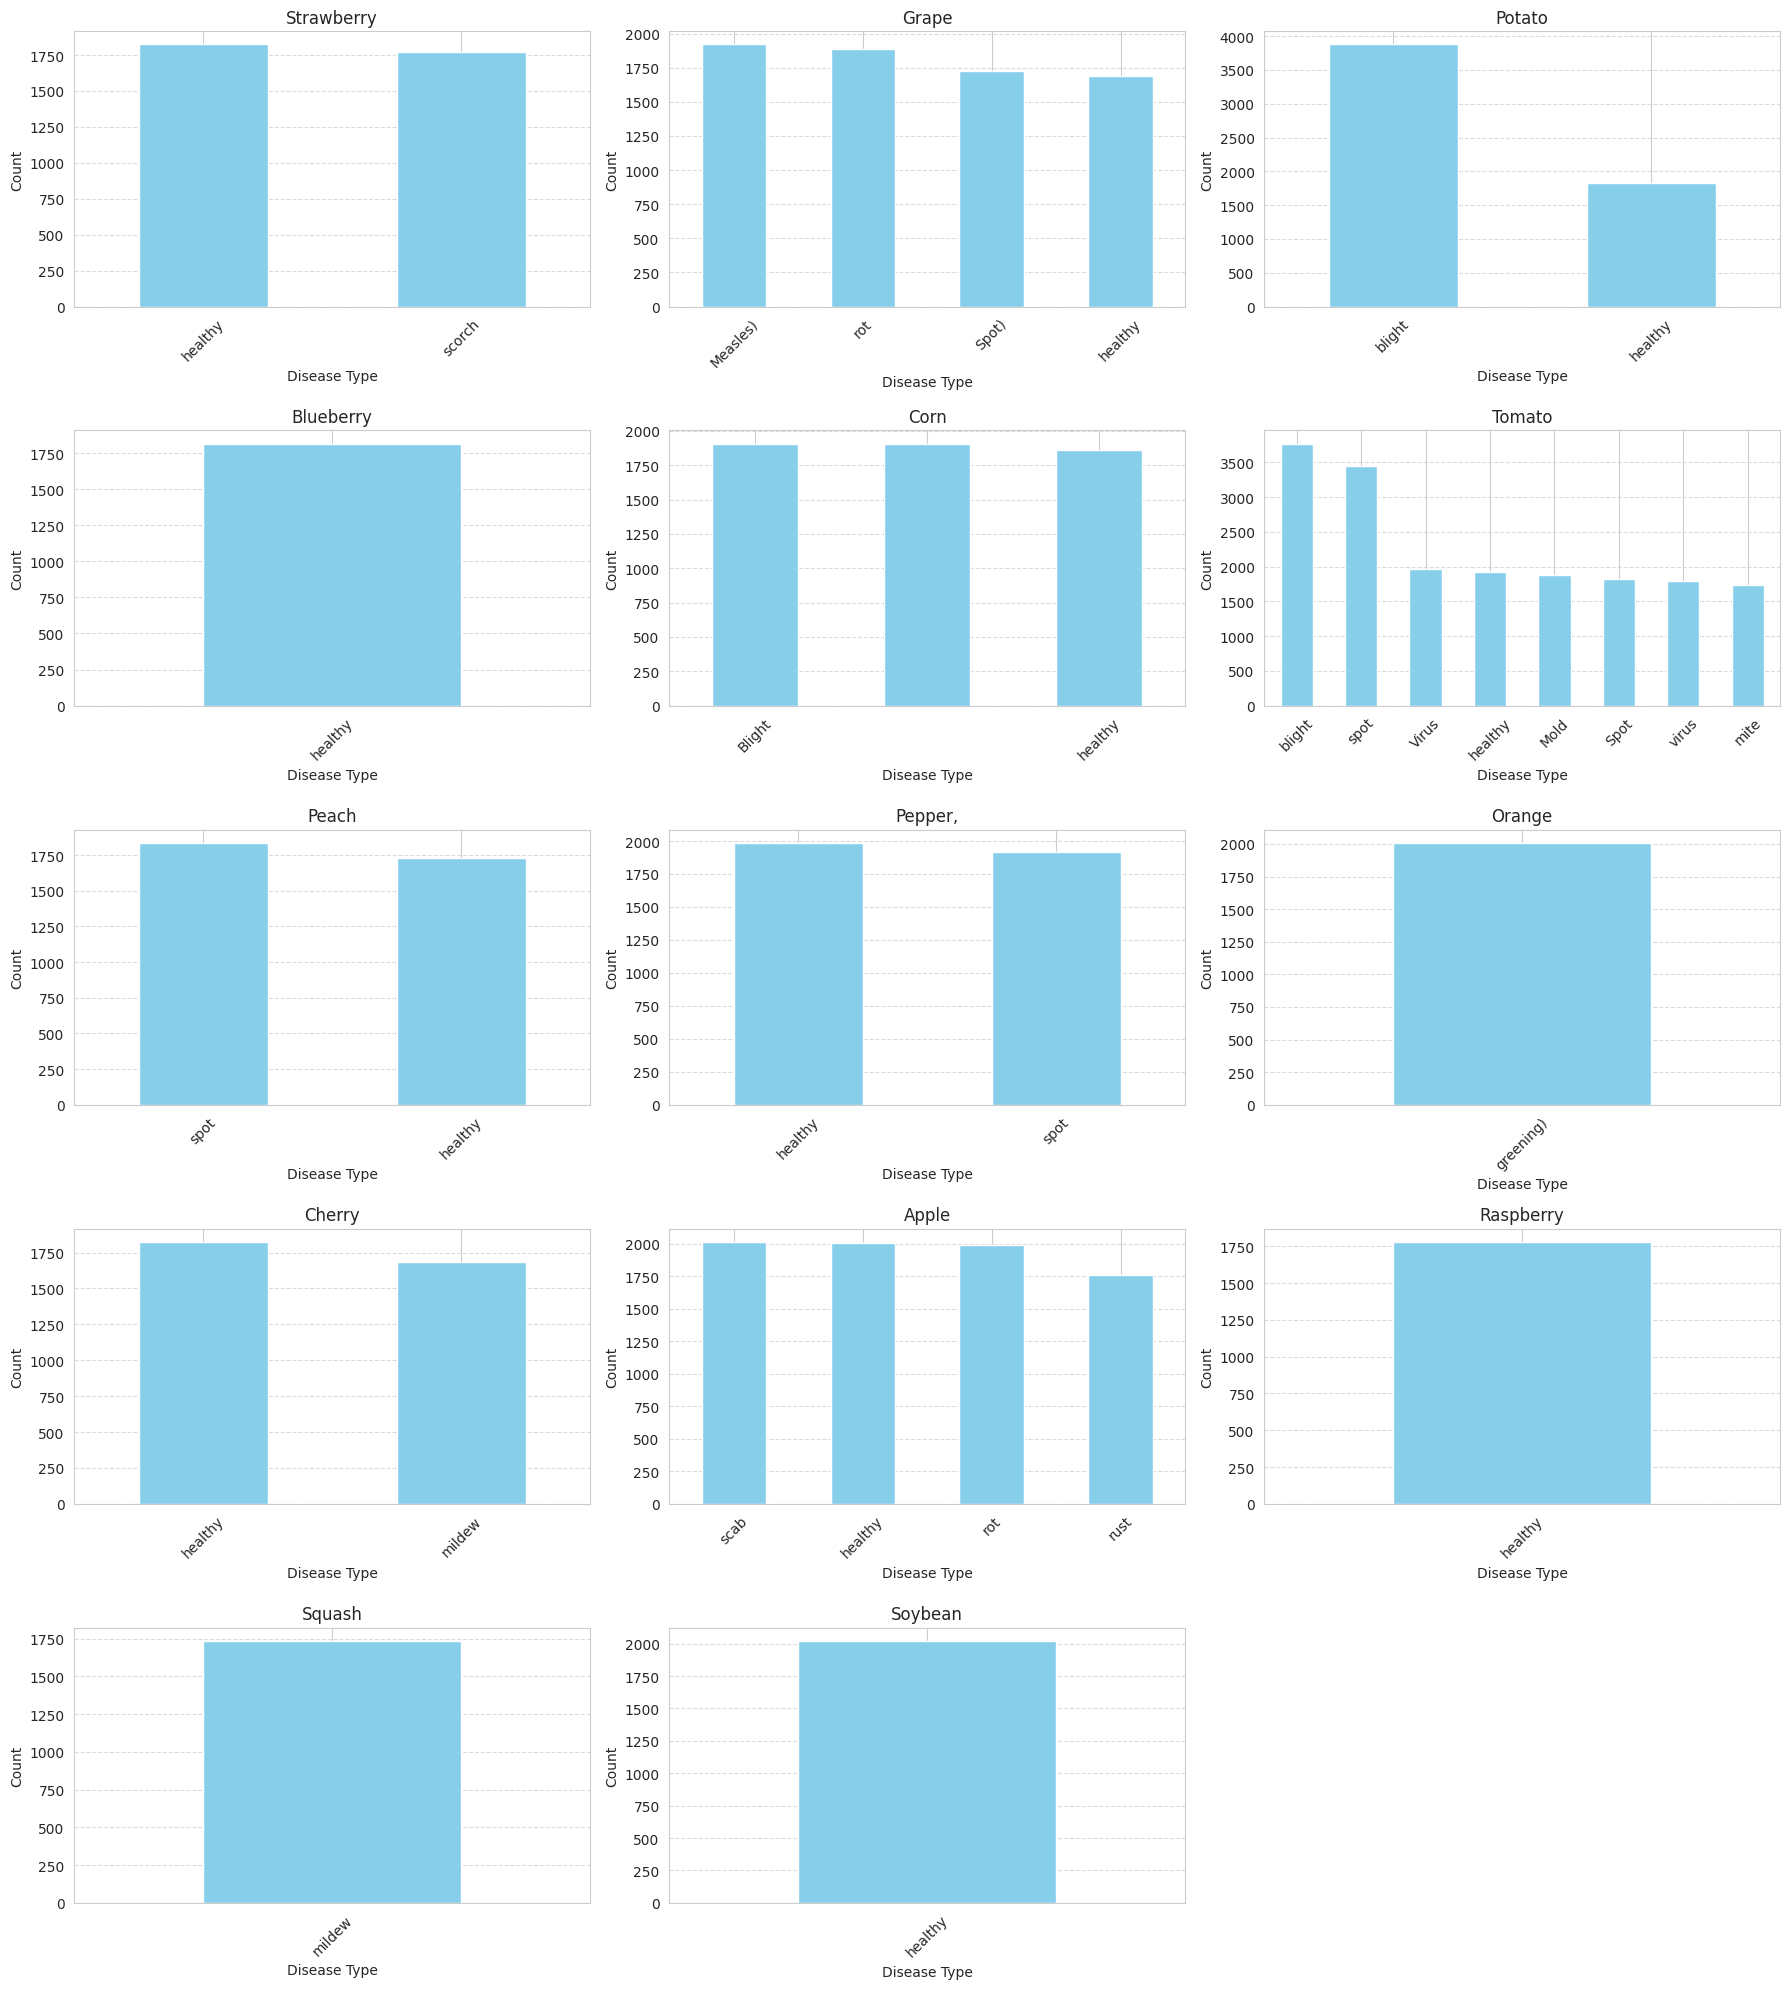

In [ ]:
plot_disease_counts_for_plants(updated_df)

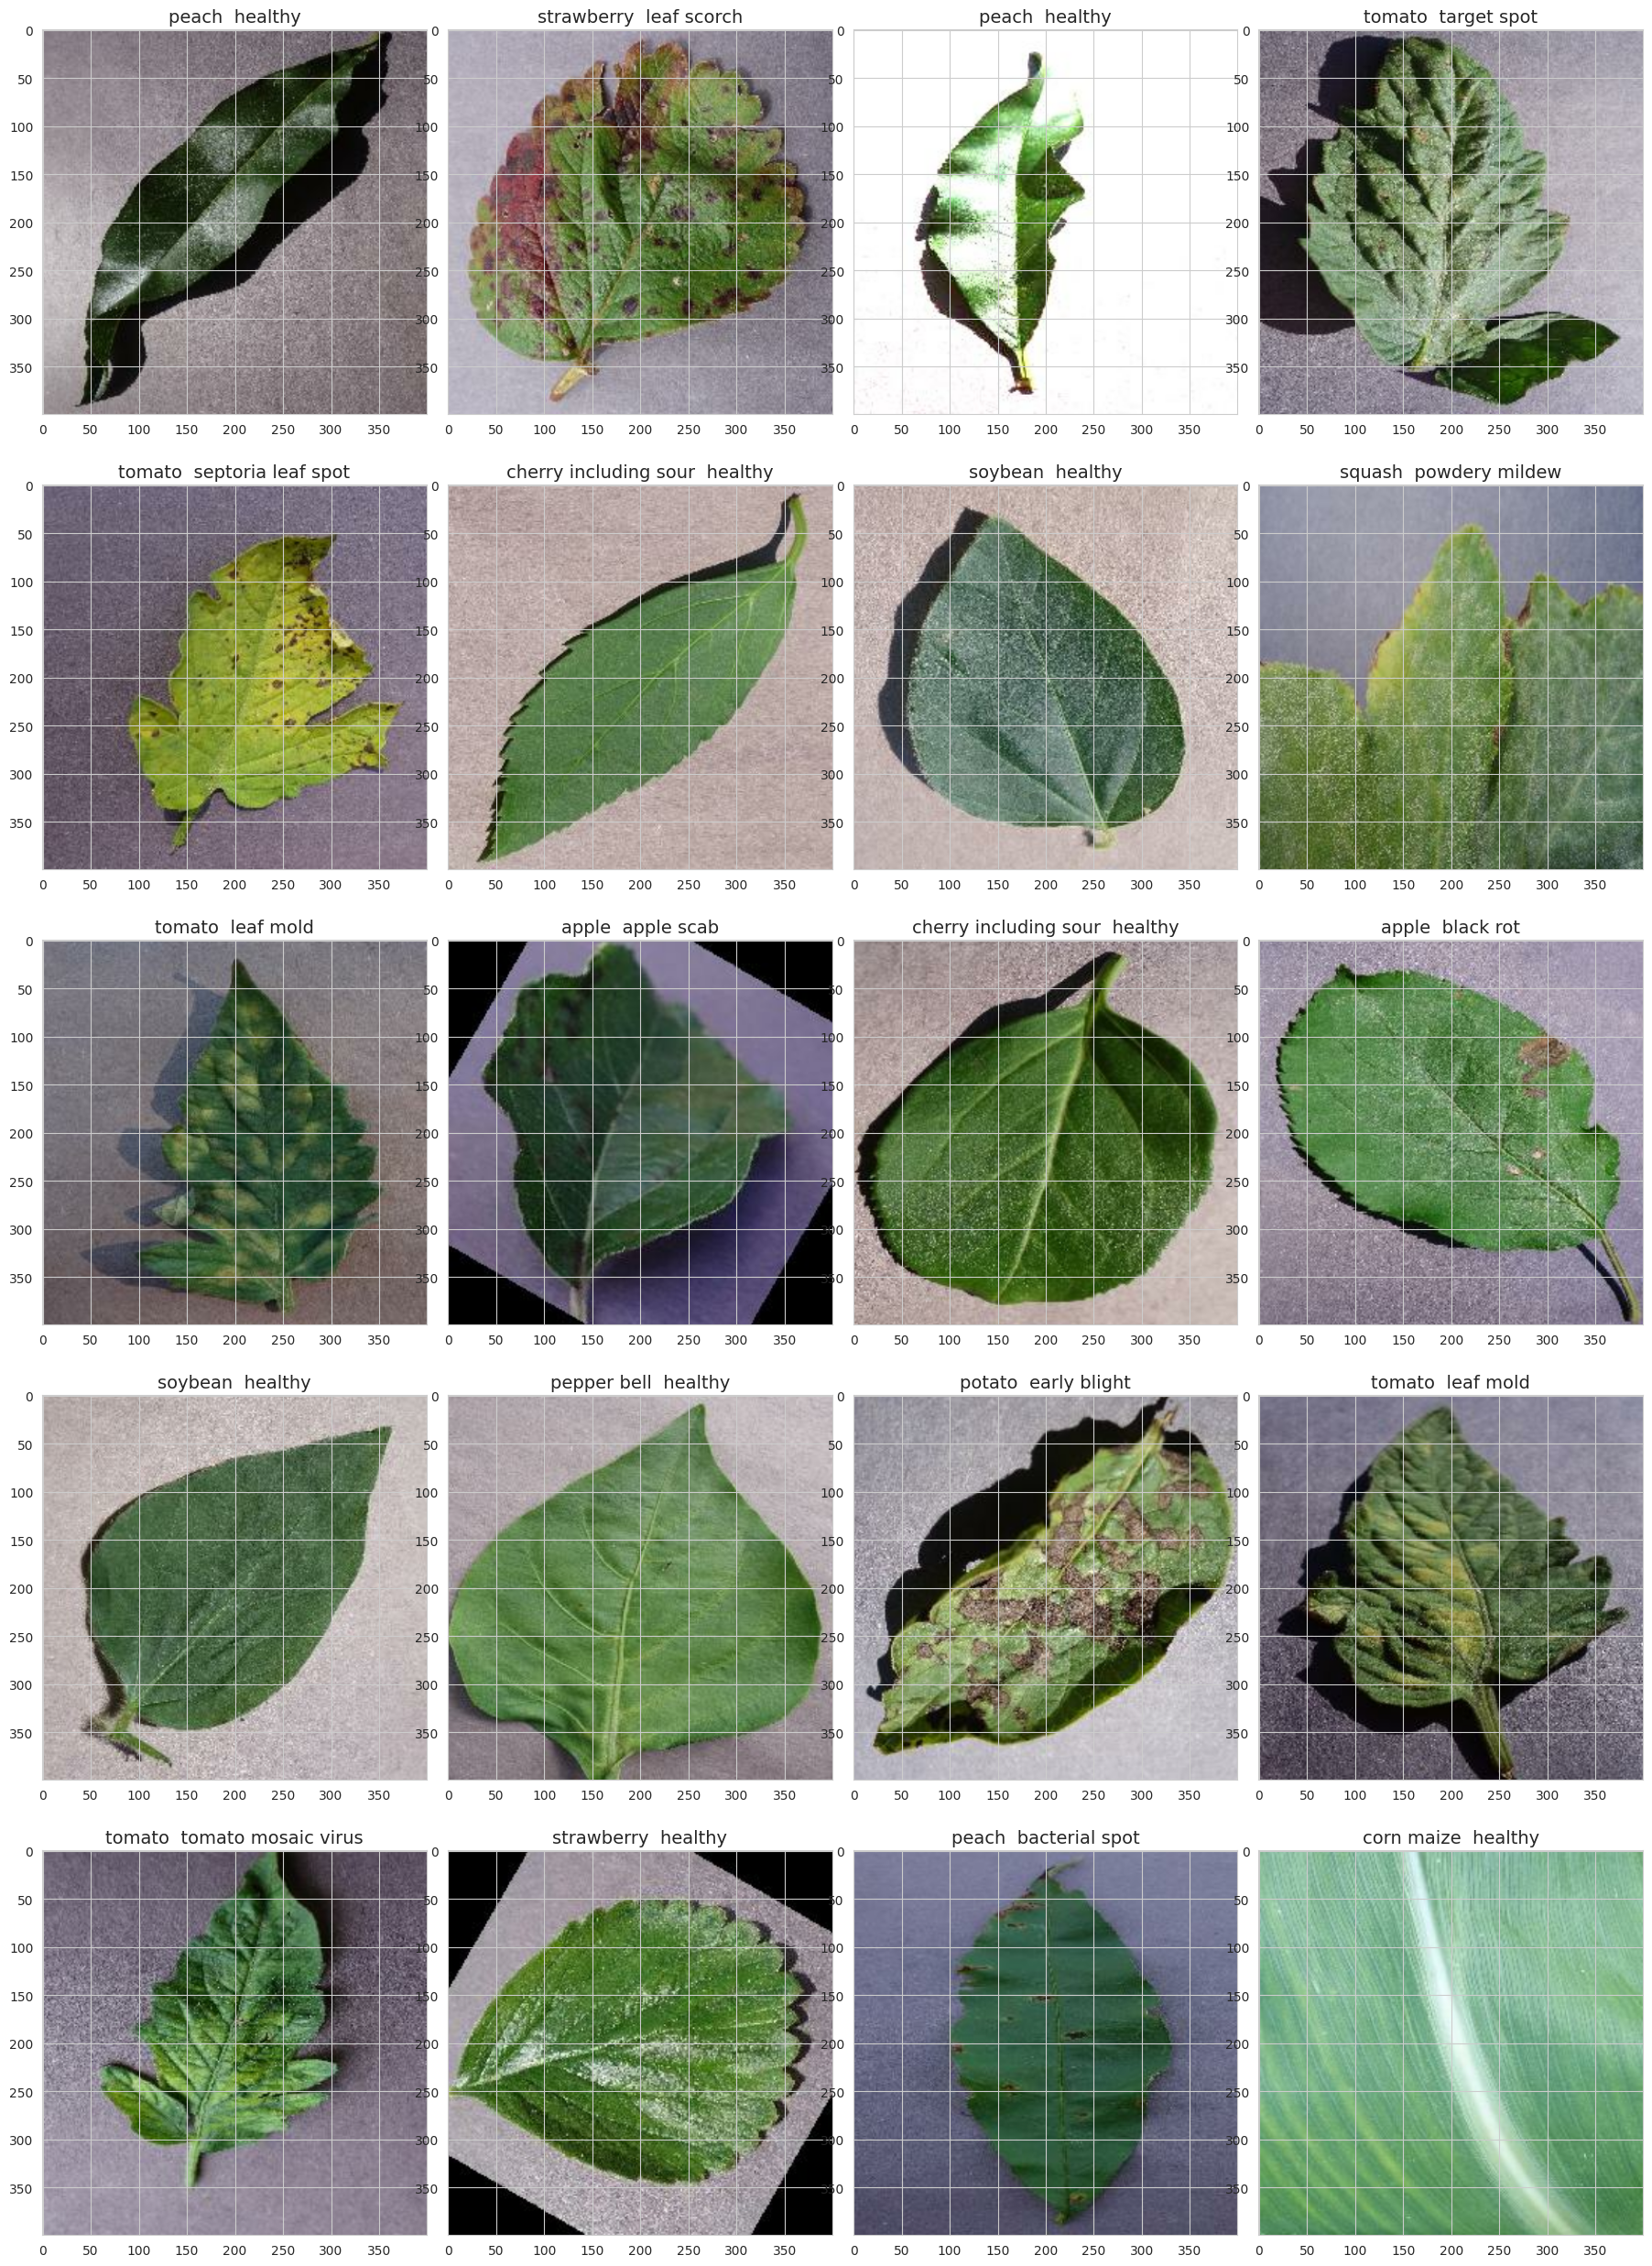

In [ ]:
plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=0.5)

random_samples = updated_df.sample(20)

for i, (index, row) in enumerate(random_samples.iterrows()):
    plt.subplot(5, 4, i + 1)

    image = tf.io.read_file(row['image_path'])
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [400, 400])

    plt.imshow(image)
    plt.title(row['label'], fontsize=14)
    plt.axis('on')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(result,test_size=0.33, stratify = result['label'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(Train['label'].to_list())

LabelEncoder()

In [ ]:
with open('/content/drive/MyDrive/Capstone_1/encoders','wb') as file:
  pickle.dump(le,file)

In [ ]:
with open('/content/drive/MyDrive/Capstone_1/labels','wb') as file:
  pickle.dump(list(le.classes_),file)

In [ ]:
Train_image_labels, _ = pd.factorize(Train['label'])
label_mapping = {label: idx for idx, label in enumerate(Train['label'].unique())}
Test_image_labels = Test['label'].replace(label_mapping).to_numpy()

In [ ]:
Train_image_paths        = Train['image_path'].tolist()
Test_image_paths   = Test['image_path'].tolist()

In [ ]:
batch_size = 16

In [ ]:


def load_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    return image

def preprocess_image(image, label, img_size=(400, 400)):
    image = tf.image.resize(image, img_size)
    image = tf.image.convert_image_dtype(image, tf.float32)
    y = tf.one_hot(tf.cast(label, tf.uint8), 120)
    return image, y

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_hue(image, 0.5)
    image = tf.image.random_saturation(image, 0.5, 2.5)
    image = tf.image.random_brightness(image, 0.5)
    image = tf.image.random_contrast(image, 0.1, 2)
    return image, label

def tfdata_generator(images, labels, is_training, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    # Load and preprocess
    dataset = dataset.map(lambda x, y: (load_image(x), y))
    dataset = dataset.map(preprocess_image)

    if is_training:
        dataset = dataset.cache()
        dataset = dataset.shuffle(18000) # depends on sample size
        if np.random.uniform(0,1) > 0.6:
            dataset = dataset.map(augment, num_parallel_calls=4)

    dataset = dataset.batch(batch_size, drop_remainder=True if is_training else False)
    dataset = dataset.repeat()
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset


In [ ]:
train_generator       = tfdata_generator(Train_image_paths, Train_image_labels, is_training=True)
test_generator  = tfdata_generator(Test_image_paths, Test_image_labels, is_training=False)

In [ ]:
steps_per_epoch  = np.ceil(len(Train_image_paths)/batch_size)
validation_steps = np.ceil(len(Test_image_paths)/batch_size)

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
keras.backend.clear_session()
np.random.seed(0)
rn.seed(0)

In [ ]:
input_shape = (400, 400, 3)
input_layer = Input(shape=input_shape)

# Load pre-trained InceptionV3
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_inception.layers:
    layer.trainable = True

# Use the pre-trained model
x = base_inception(input_layer)

# Additional Convolutional Layers
x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

# Global Average Pooling (reduces spatial dimensions)
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

# Classification layer
output_layer = Dense(120, activation='softmax')(x)

# Construct the complete model
Inception = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
Inception.compile(optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9),
                                 loss='categorical_crossentropy',metrics=['categorical_accuracy'])
Inception.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 11, 11, 2048)      21802784  
                                                                 
 conv2d_94 (Conv2D)          (None, 11, 11, 512)       9437696   
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 512)         0         
 g2D)                                                            
                                                                 
 batch_normalization_94 (Ba  (None, 5, 5, 512)         2048      
 tchNormalization)                                               
                                                                 
 conv2d_95 (Conv2D)          (None, 5, 5, 256)         117990

In [ ]:
es        = EarlyStopping(monitor='val_loss', patience=3)
mc        = ModelCheckpoint('/content/drive/MyDrive/Capstone_1/Inception.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2,verbose=0)

In [ ]:
history = Inception.fit(train_generator,steps_per_epoch=steps_per_epoch,
                             validation_data  = test_generator,epochs=25,
                             validation_steps = validation_steps,
                             callbacks        = [es,mc,reduce_lr])

Epoch 1/25
1395/1395 [==============================] - ETA: 0s - loss: 5.6778 - categorical_accuracy: 0.4543
Epoch 1: val_loss improved from inf to 2.03554, saving model to /content/drive/MyDrive/Capstone_1/Inception.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1395/1395 [==============================] - 253s 158ms/step - loss: 5.6778 - categorical_accuracy: 0.4543 - val_loss: 2.0355 - val_categorical_accuracy: 0.5939 - lr: 0.0100
Epoch 2/25
1395/1395 [==============================] - ETA: 0s - loss: 0.8463 - categorical_accuracy: 0.8651
Epoch 2: val_loss improved from 2.03554 to 0.82454, saving model to /content/drive/MyDrive/Capstone_1/Inception.h5
1395/1395 [==============================] - 216s 155ms/step - loss: 0.8463 - categorical_accuracy: 0.8651 - val_loss: 0.8245 - val_categorical_accuracy: 0.8621 - lr: 0.0100
Epoch 3/25
1395/1395 [==============================] - ETA: 0s - loss: 0.5537 - categorical_accuracy: 0.9335
Epoch 3: val_loss improved from 0.82454 to 0.42876, saving model to /content/drive/MyDrive/Capstone_1/Inception.h5
1395/1395 [==============================] - 216s 155ms/step - loss: 0.5537 - categorical_accuracy: 0.9335 - val_loss: 0.4288 - val_categorical_accuracy: 0.9589 - lr: 0.0100
Epoch 4/25
1395/1395 [======

In [ ]:
print("Accuracy: ", history.history['categorical_accuracy'][-4], '\n')
print("loss: ", history.history['loss'][-4], '\n')
print("Validation_Accuracy: ", history.history['val_categorical_accuracy'][-4], '\n')
print("Validation loss: ", history.history['val_loss'][-4], '\n')



Accuracy:  0.9985215067863464 

loss:  0.09493620693683624 

Validation_Accuracy:  0.9955838918685913 

Validation loss:  0.08641808480024338 



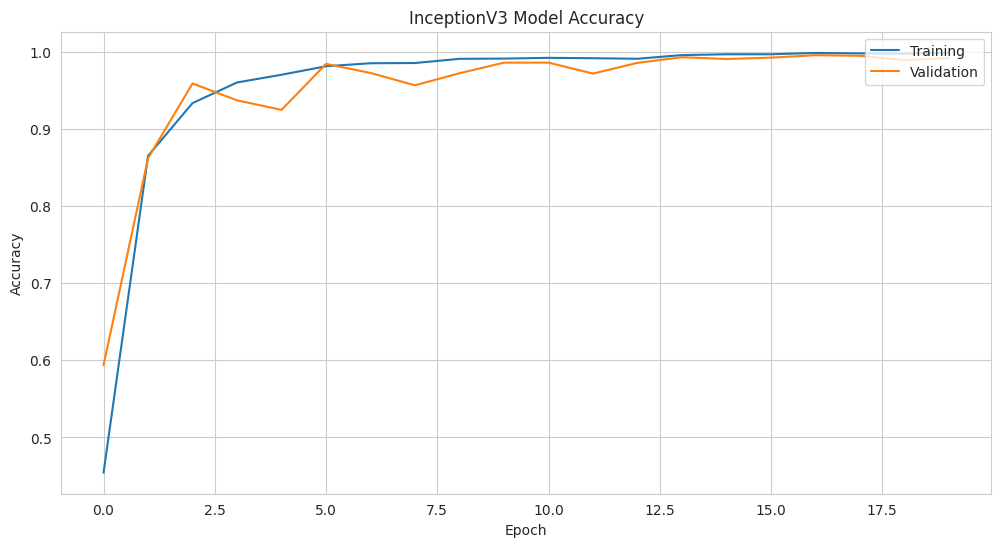

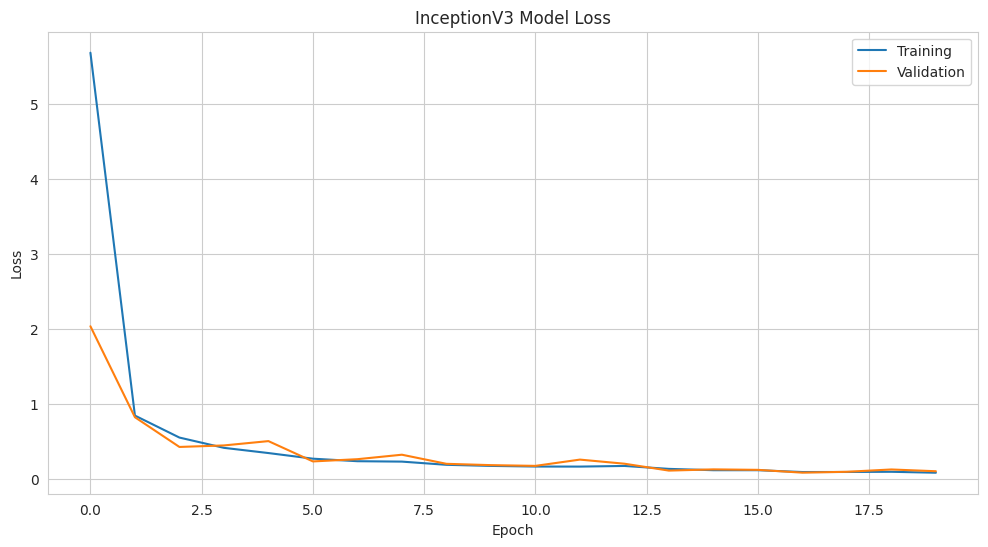

In [ ]:
def plot_history_individual_fig_size(history, accuracy_title, loss_title, fig_size=(12, 6)):
    # Plotting accuracy with increased figure size
    plt.figure(figsize=fig_size)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title(accuracy_title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

    # Plotting loss with increased figure size
    plt.figure(figsize=fig_size)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(loss_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()


plot_history_individual_fig_size(Inception.history,'InceptionV3 Model Accuracy','InceptionV3 Model Loss')



In [6]:
x = PrettyTable()
#x.field_names = ["Model","Train Loss", "Validation Loss", "Train Accuracy", "Validation Accuracy"]
x.field_names = ["Model","Train Loss", "Validation Loss", "Train Accuracy", "Validation Accuracy"]
x.add_row(["InceptionV3",0.0949,0.0864,0.998,0.995])
print(x)

+-------------+------------+-----------------+----------------+---------------------+
|    Model    | Train Loss | Validation Loss | Train Accuracy | Validation Accuracy |
+-------------+------------+-----------------+----------------+---------------------+
| InceptionV3 |   0.0949   |      0.0864     |     0.998      |        0.995        |
+-------------+------------+-----------------+----------------+---------------------+


In [8]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone_1/Inception.h5')

In [9]:
def predict_image(image):
    # Resize and process the image within the prediction function
    processed_image = tf.image.resize(image, [400, 400])
    processed_image = processed_image / 255.0
    prediction = model.predict(np.array([processed_image]))
    return labels[np.argmax(prediction)]




In [5]:
# Create a Gradio interface
iface = gr.Interface(fn=predict_image,
                     inputs=gr.Image(),  # Simplified input
                     outputs="text",
                     title="Plant Disease Classification",
                     description="Upload an image of a plant to classify its health status")

# Launch the interface
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b1aa0e49b9a95015d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
